In [11]:
#importing the requried python package
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [12]:
#Reading the netCDF4 precipitation and temperature dataset from the directory
data_pre = Dataset(r'C:\Users\Naveen Yoganandam\Projects\Precipitaion\data\Precipitation_data_2011_2020.nc')
data_temp = Dataset(r'C:\Users\Naveen Yoganandam\Projects\Temperature\data\Temperature_data_2011_2020.nc')

In [13]:
#Accessing the variables and declaring the new variables
lat_pre = data_pre.variables['lat'][:]
long_pre = data_pre.variables['lon'][:]
time_pre = data_pre.variables['time'][:]
pre = data_pre.variables['pre'][:]

In [14]:
#Accessing the variables and declaring the new variables
lat_temp = data_temp.variables['lat'][:]
long_temp = data_temp.variables['lon'][:]
time_temp = data_temp.variables['time'][:]
temp = data_temp.variables['tmp'][:]

C:\Users\NAVEEN~1\AppData\Local\Temp/ipykernel_12132/283015377.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme_pre = mp_pre.pcolor(x, y, np.squeeze(pre[0,:,:]), cmap = 'gist_ncar')
C:\Users\NAVEEN~1\AppData\Local\Temp/ipykernel_12132/283015377.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[0,:,:]), cmap = 'jet')


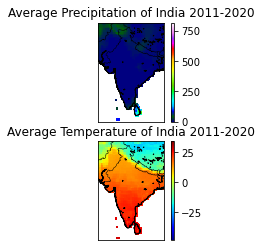

<Figure size 432x288 with 0 Axes>

In [26]:
#Declaring figure and subplots of the basemap
fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (1,0))

#Declaring the preciptation map by the matpltlib basemap package
ax1.set_title("Average Precipitation of India 2011-2020")
mp_pre = Basemap(projection = 'merc',
             llcrnrlon = 66.611474,
             llcrnrlat = 3.695643,
             urcrnrlon = 90.644330,
             urcrnrlat = 36.758681,
             resolution = 'i',
             ax=ax1)

#Declaring the preciptation map by the matpltlib basemap package
ax2.set_title("Average Temperature of India 2011-2020")
mp_temp = Basemap(projection = 'merc',
             llcrnrlon = 66.611474,
             llcrnrlat = 3.695643,
             urcrnrlon = 90.644330,
             urcrnrlat = 36.758681,
             resolution = 'i',
             ax=ax2)

lon, lat = np.meshgrid(long_pre,lat_pre)
lon, lat = np.meshgrid(long_temp,lat_temp)
x,y = mp_pre(lon, lat)
x,y = mp_temp(lon, lat)

#Declaring the colour scheme  of the maps 
c_scheme_pre = mp_pre.pcolor(x, y, np.squeeze(pre[0,:,:]), cmap = 'gist_ncar')
mp_pre.drawcoastlines()
mp_pre.drawstates()
mp_pre.drawcountries()

c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[0,:,:]), cmap = 'jet')
mp_temp.drawcoastlines()
mp_temp.drawstates()
mp_temp.drawcountries()

cbar = mp_pre.colorbar(c_scheme_pre, location = 'right', pad = '10%')
cbar = mp_temp.colorbar(c_scheme_temp, location = 'right', pad = '10%')

#plotting the map
plt.show()

#export as pdf
plt.savefig("output.pdf")
